# Data exploration, cleaning and processing.


In [1]:
"""
Loading in the neccesary modules for data analysis and display
as well as extening the amoung of visible columns for my queries

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",237)


In [2]:
#load in the data frame from the data folder
base_Datebase = pd.read_csv(r"../../Data/csv_hil/psam_h17.csv")


C:\Users\Ice\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# displaying the date from the US census for the 2019 calendar year
base_Datebase

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2014000000015,3,3108,2,17,1061728,1070673,13,4,...,4,15,25,24,15,13,11,15,14,24
1,H,2014000000029,3,2501,2,17,1061728,1070673,3,2,...,4,4,7,8,7,8,4,6,4,7
2,H,2014000000041,3,3502,2,17,1061728,1070673,31,1,...,25,38,49,53,9,26,34,24,9,14
3,H,2014000000113,3,3526,2,17,1061728,1070673,7,2,...,2,7,5,7,7,12,3,6,8,11
4,H,2014000000125,3,1105,2,17,1061728,1070673,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293827,H,2018HU1400791,3,401,2,17,1000000,1013097,21,0,...,39,6,22,6,6,23,24,23,22,6
293828,H,2018HU1400807,3,3208,2,17,1000000,1013097,18,4,...,6,16,6,5,19,6,31,19,16,17
293829,H,2018HU1400835,3,2601,2,17,1000000,1013097,24,2,...,36,7,25,42,33,19,25,25,24,23
293830,H,2018HU1400870,3,3407,2,17,1000000,1013097,24,2,...,39,23,7,24,7,46,24,7,7,23


In [4]:

""" 
Looking at the data to see what the overall shape and makeup of the data set is

"""
base_Datebase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293832 entries, 0 to 293831
Columns: 237 entries, RT to WGTP80
dtypes: float64(145), int64(90), object(2)
memory usage: 531.3+ MB


In [5]:
"""
Futher looking into the data base to see what type each column is.
 This is to ensure that the data in each column makes sense with how it is typed

"""
base_Datebase.dtypes

RT              object
SERIALNO        object
DIVISION         int64
PUMA             int64
REGION           int64
ST               int64
ADJHSG           int64
ADJINC           int64
WGTP             int64
NP               int64
TYPE             int64
ACCESS         float64
ACR            float64
AGS            float64
BATH           float64
BDSP           float64
BLD            float64
BUS            float64
BROADBND       float64
COMPOTHX       float64
CONP           float64
DIALUP         float64
ELEFP          float64
ELEP           float64
FS             float64
FULFP          float64
FULP           float64
GASFP          float64
GASP           float64
HFL            float64
HISPEED        float64
HOTWAT         float64
INSP           float64
LAPTOP         float64
MHP            float64
MRGI           float64
MRGP           float64
MRGT           float64
MRGX           float64
OTHSVCEX       float64
REFR           float64
RMSP           float64
RNTM           float64
RNTP       

In [6]:
#To see which columns have null values and may need to be imputed
base_Datebase.isna().sum()

RT                  0
SERIALNO            0
DIVISION            0
PUMA                0
REGION              0
ST                  0
ADJHSG              0
ADJINC              0
WGTP                0
NP                  0
TYPE                0
ACCESS          44144
ACR             95771
AGS            263643
BATH            26958
BDSP            26958
BLD             26958
BUS             95771
BROADBND        90049
COMPOTHX        44144
CONP           112281
DIALUP          90049
ELEFP           44144
ELEP            53154
FS              17186
FULFP           44144
FULP           286763
GASFP           44144
GASP           115233
HFL             44144
HISPEED         90049
HOTWAT          26958
INSP           112281
LAPTOP          44144
MHP            288050
MRGI           184717
MRGP           184717
MRGT           184717
MRGX           112281
OTHSVCEX        90049
REFR            26958
RMSP            26958
RNTM           225782
RNTP           225782
RWAT            26958
RWATPR    

### Now that we know our null values we can filter them or or impute them.

In [7]:
"""
Going to drop the nan values from the target column due to not wanting to impute them. 
In an attempt to keep the data as unmodifed as possible for ease of replicability and less data manipulation for more meaningful results.
I think 246k values is enough for now until a good imputing method is avalible.

--Edit: I have found that there is an error with the previously state thought process due to there still being negative values as well as characters/alphanumerics within the target column HINCP which is the column referncing House hold Income. Refence Page 11 of the 2014-2018 ACS PUMS Data Dictionary
Next potential problem is eliminating households with an income of 1 when it comes to the prediction process 

"""
no_Zero_Values = base_Datebase[(base_Datebase["HINCP"]>=1)] 

# df[(df['Salary_in_1000']>=100) & (df['Age']<60) & df['FT_Team'].str.startswith('S')][['Name','Age','Salary_in_1000']]
no_Zero_Values


,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2014000000015,3,3108,2,17,1061728,1070673,13,4,...,4,15,25,24,15,13,11,15,14,24
1,H,2014000000029,3,2501,2,17,1061728,1070673,3,2,...,4,4,7,8,7,8,4,6,4,7
2,H,2014000000041,3,3502,2,17,1061728,1070673,31,1,...,25,38,49,53,9,26,34,24,9,14
3,H,2014000000113,3,3526,2,17,1061728,1070673,7,2,...,2,7,5,7,7,12,3,6,8,11
6,H,2014000000215,3,1204,2,17,1061728,1070673,25,3,...,22,20,25,29,7,8,29,28,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293826,H,2018HU1400768,3,3208,2,17,1000000,1013097,14,1,...,13,4,4,4,13,21,14,4,12,22
293828,H,2018HU1400807,3,3208,2,17,1000000,1013097,18,4,...,6,16,6,5,19,6,31,19,16,17
293829,H,2018HU1400835,3,2601,2,17,1000000,1013097,24,2,...,36,7,25,42,33,19,25,25,24,23
293830,H,2018HU1400870,3,3407,2,17,1000000,1013097,24,2,...,39,23,7,24,7,46,24,7,7,23


In [8]:
pd.set_option('display.max_rows',237)
no_Zero_Values["HINCP"].value_counts()
# """
# I mannualy scrolled through all 16k Rows to verify that no numerical  elements
# in the fututure i will add a filter to eliminate non numerical values
# No need to do a is not na method because there are no null values
# """


50000.0     2549
60000.0     2350
40000.0     2207
30000.0     2083
100000.0    1836
            ... 
610400.0       1
520200.0       1
123450.0       1
3350.0         1
28820.0        1
Name: HINCP, Length: 16999, dtype: int64

246k row to work with no null values the next step is to filter them out to not include any negative or non numerical values

In [9]:
no_Zero_Values[["HINCP"]]

,HINCP
0,47900.0
1,36100.0
2,100000.0
3,45000.0
6,88000.0
...,...
293826,30000.0
293828,150000.0
293829,85000.0
293830,117500.0


In [10]:
no_Zero_Values.info()
# this new filtering method took out more values that were in the original iteration 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246425 entries, 0 to 293831
Columns: 237 entries, RT to WGTP80
dtypes: float64(145), int64(90), object(2)
memory usage: 447.5+ MB


<AxesSubplot:>

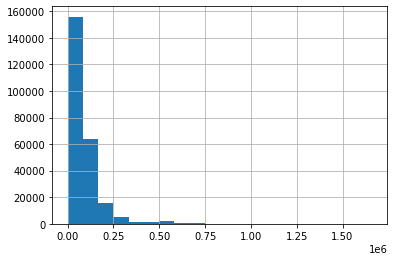

In [11]:
no_Zero_Values["HINCP"].hist(bins=20)

In [12]:
target_values=no_Zero_Values["HINCP"]

In [13]:
target_values

0          47900.0
1          36100.0
2         100000.0
3          45000.0
6          88000.0
            ...   
293826     30000.0
293828    150000.0
293829     85000.0
293830    117500.0
293831     89000.0
Name: HINCP, Length: 246425, dtype: float64

In [14]:
# non_nans_and_non_zero
# This is the first iteration so I will keep this here for referecein purposes to see how more stringent i can be with the date as i continure to iterate on this project

In [15]:
### base_df_1 has non nans and no zero values
# base_df_1=df.merge(non_nans_and_non_zero,how="inner",right_index=True,left_index=True)

In [16]:
# base_df_1

In [17]:
#base_df_2 has no nans but has zeros I want to experiment with both because the zeros could be valuable._2
# base_df_2=df.merge(no_Nan_Values,how="inner",right_index=True,left_index=True)

In [18]:
# base_df_2

Lost about 3k rows, but we can impute those once we find a way to go about that.
 Now time to see what coeffcients look the best with our target.

In [19]:
# corr=base_df_1.corrwith(non_nans_and_non_zero)

In [20]:
correlations=no_Zero_Values.corrwith(target_values)

In [21]:
correlations
# got some nan values in the correlation 

DIVISION            NaN
PUMA           0.157874
REGION              NaN
ST                  NaN
ADJHSG        -0.043037
ADJINC        -0.044076
WGTP          -0.010159
NP             0.242722
TYPE                NaN
ACCESS        -0.228900
ACR            0.011072
AGS           -0.016419
BATH          -0.009805
BDSP           0.331880
BLD           -0.118647
BUS            0.034477
BROADBND      -0.122118
COMPOTHX      -0.033198
CONP           0.055466
DIALUP         0.030370
ELEFP          0.073784
ELEP           0.159195
FS             0.197263
FULFP          0.013862
FULP          -0.076157
GASFP          0.131733
GASP           0.075131
HFL           -0.081782
HISPEED       -0.115071
HOTWAT              NaN
INSP           0.320217
LAPTOP        -0.249272
MHP           -0.004821
MRGI           0.081684
MRGP           0.519819
MRGT           0.063809
MRGX          -0.162175
OTHSVCEX       0.023875
REFR          -0.012534
RMSP           0.364914
RNTM           0.030937
RNTP           0

In [22]:
positive_correlations = correlations[(correlations >= 0)]

In [23]:
positive_correlations

PUMA          0.157874
NP            0.242722
ACR           0.011072
BDSP          0.331880
BUS           0.034477
CONP          0.055466
DIALUP        0.030370
ELEFP         0.073784
ELEP          0.159195
FS            0.197263
FULFP         0.013862
GASFP         0.131733
GASP          0.075131
INSP          0.320217
MRGI          0.081684
MRGP          0.519819
MRGT          0.063809
OTHSVCEX      0.023875
RMSP          0.364914
RNTM          0.030937
RNTP          0.491875
SATELLITE     0.020428
SMP           0.190745
TOIL          0.037073
VALP          0.489500
VEH           0.295447
WATFP         0.109668
WATP          0.099404
YBL           0.154955
FINCP         0.994821
GRNTP         0.495117
HHL           0.030205
HINCP         1.000000
HUGCL         0.011010
MULTG         0.025338
MV            0.015446
NOC           0.129014
NPF           0.101870
NRC           0.123641
PSF           0.019289
R18           0.138968
RESMODE       0.174784
SMOCP         0.527864
SSMC       

In [24]:
negative_correlations = correlations[(correlations <0)]
negative_correlations

ADJHSG        -0.043037
ADJINC        -0.044076
WGTP          -0.010159
ACCESS        -0.228900
AGS           -0.016419
BATH          -0.009805
BLD           -0.118647
BROADBND      -0.122118
COMPOTHX      -0.033198
FULP          -0.076157
HFL           -0.081782
HISPEED       -0.115071
LAPTOP        -0.249272
MHP           -0.004821
MRGX          -0.162175
REFR          -0.012534
RWAT          -0.012865
SINK          -0.007521
SMARTPHONE    -0.227781
STOV          -0.034411
TABLET        -0.234674
TEL           -0.021206
TEN           -0.267937
FES           -0.309184
FPARC         -0.032571
GRPIP         -0.507217
HHT           -0.301276
HUPAC         -0.135911
HUPAOC        -0.142164
HUPARC        -0.136641
KIT           -0.036182
LNGI          -0.076246
NPP           -0.020991
NR            -0.006677
OCPIP         -0.371492
PARTNER       -0.011643
PLM           -0.015875
R60           -0.055295
R65           -0.089039
SMX           -0.067046
SRNT          -0.226880
WKEXREL       -0

In [25]:
relevant_correlations = positive_correlations[(positive_correlations >=.3)] 
relevant_correlations

BDSP      0.331880
INSP      0.320217
MRGP      0.519819
RMSP      0.364914
RNTP      0.491875
VALP      0.489500
FINCP     0.994821
GRNTP     0.495117
HINCP     1.000000
SMOCP     0.527864
TAXAMT    0.516055
dtype: float64

In [26]:
# corr

In [27]:
#Store these values of intest with their pearson coefficent in this celll due to there positive correlation with the target value.
# PUMA           0.157883
# NP             0.242765
# ACR            0.010921
# BDSP           0.331825
# BUS            0.034486
# CONP           0.055495
# FS             0.197262
# INSP           0.320073
# MRGP           0.519832
# MRGI           0.081537
# RMSP           0.364845
# RNTP           0.491500
# SMP            0.190873
# TOIL           0.037039
# VALP           0.489298
# VEH            0.295509
# YBL            0.154950
# TAXAMT         0.515957
# SVAL           0.208105
# SMOCP          0.527849
# WIF            0.265965

In [28]:
# #creating a Dataframe with all the features of interest to allow for easier data manipulation.
# df1_with_with_features=base_df_1.loc[:,["HINCP_x","PUMA","NP","ACR","BDSP","BUS","CONP","FS","INSP","MRGP","MRGI","RMSP",
#                                         "RNTP","SMP","TOIL","VALP","VEH","YBL","TAXAMT","SVAL","SMOCP","WIF"]]

In [29]:

Cleaned_dfv1 = pd.DataFrame(no_Zero_Values[["BDSP","INSP","MRGP","RMSP","RNTP","VALP","FINCP","GRNTP","HINCP","SMOCP","TAXAMT"]])


In [30]:
Cleaned_dfv1

,BDSP,INSP,MRGP,RMSP,RNTP,VALP,FINCP,GRNTP,HINCP,SMOCP,TAXAMT
0,3.0,NaN,NaN,6.0,1000.0,NaN,47900.0,1288.0,47900.0,NaN,NaN
1,3.0,600.0,330.0,6.0,NaN,35000.0,36100.0,NaN,36100.0,691.0,525.0
2,0.0,NaN,NaN,1.0,1000.0,NaN,NaN,1030.0,100000.0,NaN,NaN
3,2.0,NaN,NaN,5.0,750.0,NaN,NaN,820.0,45000.0,NaN,NaN
6,2.0,20.0,420.0,4.0,NaN,140.0,48000.0,NaN,88000.0,603.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...
293826,4.0,0.0,670.0,11.0,NaN,150000.0,NaN,NaN,30000.0,1366.0,6500.0
293828,4.0,1200.0,2200.0,8.0,NaN,275000.0,150000.0,NaN,150000.0,2603.0,10500.0
293829,3.0,550.0,NaN,6.0,NaN,145000.0,85000.0,NaN,85000.0,751.0,5750.0
293830,4.0,990.0,NaN,10.0,NaN,500000.0,117500.0,NaN,117500.0,1168.0,11500.0


In [31]:
# df1_with_with_features

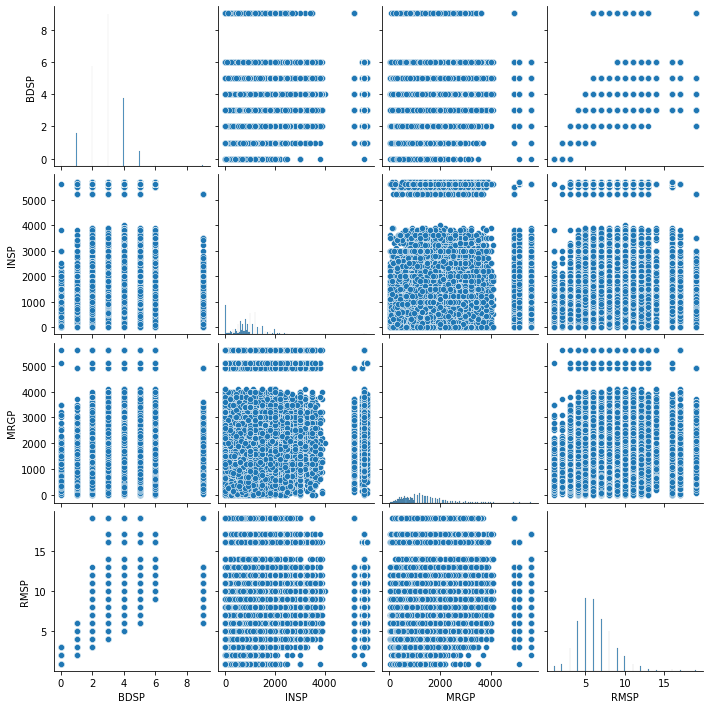

In [32]:
sns.pairplot(Cleaned_dfv1,vars=["BDSP","INSP","MRGP","RMSP"])
# "RNTP","VALP","FINCP","GRNTP","SMOCP","TAXAMT"

In [33]:
#Taking a look at the features with the highest pearson correlation to see what the correlation look like visually
# sns.pairplot(df1_with_with_features,vars=["HINCP_x","SMOCP","TAXAMT"])

In [34]:
# df1_with_with_features.info()

In [35]:
Cleaned_dfv1.isna().sum()
# From this i am taking away the values with more than 100k na values due to me thinking imputing 100k+ rows is some one diluting the original souce and not really finding meaning from the data

BDSP           0
INSP       66155
MRGP      137740
RMSP           0
RNTP      183878
VALP       66155
FINCP      83637
GRNTP     183878
HINCP          0
SMOCP      66155
TAXAMT     66155
dtype: int64

In [36]:
Cleaned_dfv2=Cleaned_dfv1 = pd.DataFrame(no_Zero_Values[["BDSP","INSP","RMSP","VALP","FINCP","HINCP","SMOCP","TAXAMT"]])

In [37]:
Cleaned_dfv2

,BDSP,INSP,RMSP,VALP,FINCP,HINCP,SMOCP,TAXAMT
0,3.0,NaN,6.0,NaN,47900.0,47900.0,NaN,NaN
1,3.0,600.0,6.0,35000.0,36100.0,36100.0,691.0,525.0
2,0.0,NaN,1.0,NaN,NaN,100000.0,NaN,NaN
3,2.0,NaN,5.0,NaN,NaN,45000.0,NaN,NaN
6,2.0,20.0,4.0,140.0,48000.0,88000.0,603.0,525.0
...,...,...,...,...,...,...,...,...
293826,4.0,0.0,11.0,150000.0,NaN,30000.0,1366.0,6500.0
293828,4.0,1200.0,8.0,275000.0,150000.0,150000.0,2603.0,10500.0
293829,3.0,550.0,6.0,145000.0,85000.0,85000.0,751.0,5750.0
293830,4.0,990.0,10.0,500000.0,117500.0,117500.0,1168.0,11500.0


In [38]:
# df1_with_with_features.isna().sum()

In [39]:
#going to takle the numerical features first.
# df1_numeric=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","CONP","INSP","MRGP","RMSP","RNTP","SMP","VALP","TAXAMT"]]

In [40]:
# df1_numeric

In [41]:
# df1_numeric.isna().sum()

In [42]:
#decided to drop the SMP column due to it have far to many values to impute 90% of that column would be imputed data.
# RNTP has a similar issue with 183k values being null. So I will drop this one as well.
# df1_numeric_dropepd_columns=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","CONP","INSP","MRGP","RMSP","VALP","TAXAMT"]]

In [43]:
# df1_numeric_dropepd_columns

In [44]:
# This was used to evalued the amount of zeros in a column if any.
# df1_numeric_dropepd_columns.TAXAMT.value_counts()

In [45]:
# Utilized this to see how the data was distributed.
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.TAXAMT>0].TAXAMT,bins=30);

In [46]:
# I can see from the dataframe that this columns has many zeros and nan values so no need to run a values counts on this.
# df1_numeric_dropepd_columns.CONP.hist(bins=30)

In [47]:
# Same process to see the distribution of the data now knowing there is are zero values
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.CONP>0].CONP,bins=30);

In [48]:
# This was used to evalued the amount of zeros in a column if any.
# df1_numeric_dropepd_columns.VALP.value_counts()

In [49]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.VALP>0].VALP,bins=30);

In [50]:
# This was used to evalued the amount of zeros in a column if any.
# df1_numeric_dropepd_columns.RMSP.value_counts()

In [51]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.RMSP>0].RMSP,bins=30);

In [52]:
# This was used to evalued the amount of zeros in a column if any.
# df1_numeric_dropepd_columns.MRGP.value_counts()

In [53]:
# Now that I know there are zero values I can drop them and look at how the data is distributed 
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.MRGP>0].MRGP,bins=30);

In [54]:
# This was used to evalued the amount of zeros in a column if any.
# df1_numeric_dropepd_columns.INSP.value_counts()

In [55]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.INSP>0].INSP,bins=30);

In [56]:
# df1_numeric_dropepd_columns.CONP.value_counts()

In [57]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.SMOCP>0].SMOCP,bins=30);

In [58]:
# df1_numeric_dropepd_columns.SMOCP.hist(bins=20)

In [59]:
# df1_numeric_dropepd_columns.MRGP.hist(bins=30)

In [60]:
# df1_numeric_dropepd_columns.MRGP.value_counts()

In [61]:
# Now that I know there are zero values I can drop them and look at how the data is distributed
# plt.hist(df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.MRGP>0].MRGP,bins=30);

In [62]:
# df1_numeric_dropepd_columns.SMOCP.hist(bins=20)

In [63]:
# df1_numeric_dropepd_columns.CONP.value_counts()

In [64]:
#checking out the median of this column to see how this median would fit in with the data and see if this aligns at all.
# connp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.CONP>0]
# conn_meadian=connp_meadian.CONP.median()

In [65]:
# conn_meadian

In [66]:
# df1_numeric_dropepd_columns.CONP.replace(np.nan,conn_meadian,inplace=True)

In [67]:
#ensuring the CONP nan value are replaced
# df1_numeric_dropepd_columns

In [68]:
# Checking out the distribution after imputing
# df1_numeric_dropepd_columns.CONP.hist(bins=30)

In [69]:
#decided to drop the CONP column that data looks to fake I suppose also thats alot of imputing for zeros and nans 
# df1_numeric_dropepd_columns_v2=df1_with_with_features[["HINCP_x","SMOCP","PUMA","NP","BDSP","INSP","RMSP","VALP","TAXAMT"]]

In [70]:
# df1_numeric_dropepd_columns_v2

In [71]:
numerical_Variables = Cleaned_dfv2.drop(["HINCP"],axis = 1)

In [72]:
numerical_Variables

,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,3.0,NaN,6.0,NaN,47900.0,NaN,NaN
1,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,0.0,NaN,1.0,NaN,NaN,NaN,NaN
3,2.0,NaN,5.0,NaN,NaN,NaN,NaN
6,2.0,20.0,4.0,140.0,48000.0,603.0,525.0
...,...,...,...,...,...,...,...
293826,4.0,0.0,11.0,150000.0,NaN,1366.0,6500.0
293828,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
293829,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
293830,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [73]:
numerical_Variables_array = numerical_Variables.to_numpy()

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
# =pd.DataFrame(imputer.fit_transform(numerical_Variables))
new_df = pd.DataFrame(imputer.fit_transform(numerical_Variables),columns = numerical_Variables.columns)


In [ ]:
# from sklearn.impute import KNNImputer
# imputer=KNNImputer(n_neighbors=5)
# new_df=pd.DataFrame(imputer.fit_transform(df1_numeric_dropepd_columns_v2))

In [ ]:
new_df.columns= df1_numeric_dropepd_columns_v2.columns

In [ ]:
new_df

In [ ]:
# #imputing data for the TAXAMT columun
# tax_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.TAXAMT>0]
# taxx_meadian=tax_meadian.TAXAMT.median()
# df1_numeric_dropepd_columns_v2.TAXAMT.replace(np.nan,taxx_meadian,inplace=True)
# taxx_meadian

In [ ]:
# #imputing data for the VALP columun
# val_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.VALP>0]
# vall_meadian=val_meadian.VALP.median()
# df1_numeric_dropepd_columns_v2.VALP.replace(np.nan,vall_meadian,inplace=True)
# vall_meadian

In [ ]:
# #imputing data for the INSP columun
# insp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.INSP>0]
# inspp_meadian=insp_meadian.INSP.median()
# df1_numeric_dropepd_columns_v2.INSP.replace(np.nan,inspp_meadian,inplace=True)
# inspp_meadian


In [ ]:
# #imputing data for the SMOCP columun
# smocp_meadian=df1_numeric_dropepd_columns[df1_numeric_dropepd_columns.SMOCP>0]
# smocpp_meadian=smocp_meadian.SMOCP.median()
# df1_numeric_dropepd_columns_v2.SMOCP.replace(np.nan,smocpp_meadian,inplace=True)
# smocpp_meadian


In [ ]:
# Finally have the numeric data frame imputed next is the categorical data
# df1_numeric_dropepd_columns_v2

In [ ]:
# df1_numeric_dropepd_columns_v2.info()

In [ ]:
# df1_with_with_features

Taking two apporches to this categorical imputing the first is assinign na values to unknown the secound is to impute the missing values with the most common
df1_categorical_columns_v1=using unknown for NA values 
df_most_common_categorical= using most common for unknown values

In [ ]:
# df1_categorical_columns_v2=df1_with_with_features[["HINCP_x","ACR","BUS","FS","TOIL","VEH","YBL"]]

In [ ]:
# df1_categorical_columns_v1=df1_with_with_features[["HINCP_x","ACR","BUS","FS","TOIL","VEH","YBL"]]

In [ ]:
# df1_categorical_columns_v1

In [ ]:
# df1_categorical_columns_v2

In [ ]:
# cat_imputer=KNNImputer(n_neighbors=5)
# new_cat_df=pd.DataFrame(cat_imputer.fit_transform(df1_categorical_columns_v2))

In [ ]:
# new_cat_df.columns= df1_categorical_columns_v2.columns

In [ ]:
# new_cat_df

In [ ]:
# df1_categorical_columns_v1.isna().sum()

Only 2 columns with NA values and and they are only 60k so not to bad.

In [ ]:
# df_most_common_categorical=df1_categorical_columns_v2

In [ ]:
#making a dataframe for nan to be filled with unknown
# df1_categorical_columns_v1[["ACR","BUS"]] = df1_categorical_columns_v1[["ACR","BUS"]].fillna("Unknown")

In [ ]:
#fill in nan values with most common value
# df_most_common_categorical[["ACR","BUS"]]=df1_categorical_columns_v2[["ACR","BUS"]].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
# df1_categorical_columns_v1

In [ ]:
# df_most_common_categorical

In [ ]:
# from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class OneHotEncoder(SklearnOneHotEncoder):
#     """(https://towardsdatascience.com/how-to-assign-labels-with-sklearn-one-hot-encoder-e59a5f17df4f)
#     """
#     def __init__(self, **kwargs):
#         super(OneHotEncoder, self).__init__(**kwargs)
#         self.fit_flag = False

#     def fit(self, X, **kwargs):
#         out = super().fit(X)
#         self.fit_flag = True
#         return out

#     def transform(self, X, **kwargs):
#         sparse_matrix = super(OneHotEncoder, self).transform(X)
#         new_columns = self.get_new_columns(X=X)
#         d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
#         return d_out

#     def fit_transform(self, X, **kwargs):
#         self.fit(X)
#         return self.transform(X)

#     def get_new_columns(self, X):
#         new_columns = []
#         for i, column in enumerate(X.columns):
#             j = 0
#             while j < len(self.categories_[i]):
#                 new_columns.append(f'{column}_{self.categories_[i][j]}')
#                 j += 1
#         return new_columns
    
# #

In [ ]:
# encoder=OneHotEncoder()

In [ ]:
# encoded_catecories=encoder.fit_transform(new_cat_df.drop("HINCP_x",axis=1))

In [ ]:
# final_df=new_df.merge(encoded_catecories,how="inner",right_index=True,left_index=True)

In [ ]:
# pd.set_option("display.max_rows",None)
# # 

In [ ]:
# final_df

In [ ]:
# final_df=final_df.drop("PUMA",axis=1)

In [ ]:
# final_df

In [ ]:
# final_df.info()

# Saving our final filtered dataframe

In [90]:
new_df

,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
4,2.0,20.0,4.0,140.0,48000.0,603.0,525.0
...,...,...,...,...,...,...,...
246420,4.0,0.0,11.0,150000.0,270000.0,1366.0,6500.0
246421,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
246422,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
246423,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [93]:
target=pd.DataFrame(Cleaned_dfv2["HINCP"])

In [94]:
target

,HINCP
0,47900.0
1,36100.0
2,100000.0
3,45000.0
6,88000.0
...,...
293826,30000.0
293828,150000.0
293829,85000.0
293830,117500.0


In [108]:
final_df=target.merge(new_df, how='inner',left_index=True, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)


In [109]:
final_df

,HINCP,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,47900.0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,36100.0,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,100000.0,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,45000.0,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
6,88000.0,3.0,774.0,6.0,154000.0,104880.0,1548.6,3880.0
...,...,...,...,...,...,...,...,...
246420,62000.0,4.0,0.0,11.0,150000.0,270000.0,1366.0,6500.0
246421,151700.0,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
246422,90700.0,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
246423,284500.0,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [ ]:
final_df.to_csv("../../Data/Imputed.csv",index=False)

### The next steps for this project are too complete the flask app and further develop the model through variable manipulation as well as scaling the values.